# IMACU
bahavioural data analysis in python 

## 1. install, load and assign

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from rsatoolbox.rdm.calc import calc_rdm
from rsatoolbox.data.dataset import Dataset, merge_datasets
from scipy.spatial import distance
from scipy.stats import ttest_rel
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# "D:\IMACU\behav\IMACU_behav_final.xlsx"
df = pd.read_excel('.../IMACU/behav/IMACU_behav.xlsx')

In [3]:
# Sess 1, before, Stim

FORMAT_Acu = ['1_EA_1_1', '1_EA_1_2', '1_EA_1_3', '1_EA_1_4', '1_EA_1_5', '1_EA_1_6', '1_EA_1_7', '1_EA_1_8', '1_EA_1_9', '1_EA_1_10', '1_EA_1_11', '1_EA_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['1_EA_2_1', '1_EA_2_2', '1_EA_2_3', '1_EA_2_4', '1_EA_2_5', '1_EA_2_6', '1_EA_2_7', '1_EA_2_8', '1_EA_2_9', '1_EA_2_10', '1_EA_2_11', '1_EA_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['1_EA_3_1', '1_EA_3_2', '1_EA_3_3', '1_EA_3_4', '1_EA_3_5', '1_EA_3_6', '1_EA_3_7', '1_EA_3_8', '1_EA_3_9', '1_EA_3_10', '1_EA_3_11', '1_EA_3_12']
df_C2 = df[FORMAT_C2]

(0.0, 6.0)

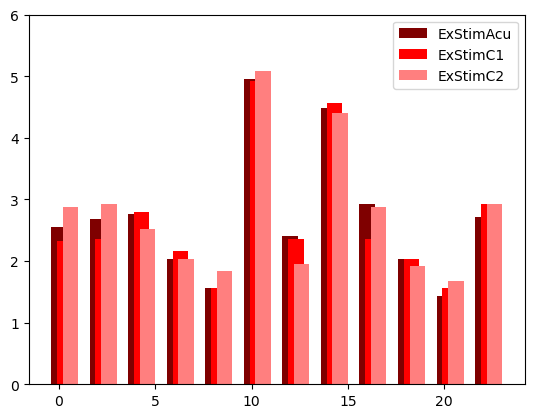

In [4]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)

stim_acu = np.nan_to_num(df_Acu_clean) # sj 6 has some NaNs
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 

plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'ExStimAcu', color =
'#7f0000')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'ExStimC1', color =
'#ff0000')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'ExStimC2', color =
'#ff7f7f')
plt.legend()

plt.ylim(0, 6)

In [5]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,1.315556,0.657778,0.143324,8.664938e-01
C(Items),11.0,893.728889,81.248081,17.703250,5.372267e-32
C(Points):C(Items),22.0,19.404444,0.882020,0.192185,9.999850e-01
Residual,864.0,3965.280000,4.589444,NaN,NaN


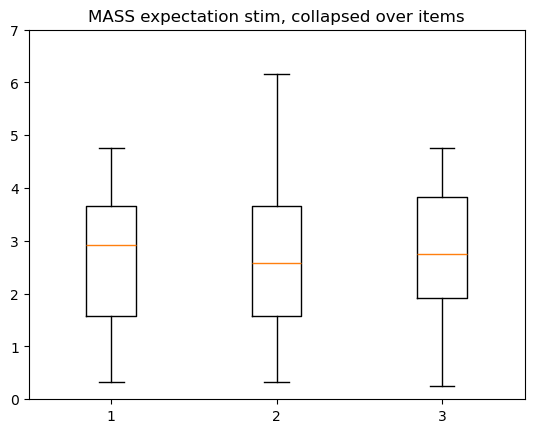

In [6]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
ex_stim = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)
plt.ylim(0, 7)
plt.title("MASS expectation stim, collapsed over items")

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('stim_pre.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_stim_pre.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_stim_pre.txt', weights_save.T)

In [7]:
# Sess 1, before, Imag

FORMAT_Acu = ['1_EI_1_1', '1_EI_1_2', '1_EI_1_3', '1_EI_1_4', '1_EI_1_5', '1_EI_1_6', '1_EI_1_7', '1_EI_1_8', '1_EI_1_9', '1_EI_1_10', '1_EI_1_11', '1_EI_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['1_EI_2_1', '1_EI_2_2', '1_EI_2_3', '1_EI_2_4', '1_EI_2_5', '1_EI_2_6', '1_EI_2_7', '1_EI_2_8', '1_EI_2_9', '1_EI_2_10', '1_EI_2_11', '1_EI_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['1_EI_3_1', '1_EI_3_2', '1_EI_3_3', '1_EI_3_4', '1_EI_3_5', '1_EI_3_6', '1_EI_3_7', '1_EI_3_8', '1_EI_3_9', '1_EI_3_10', '1_EI_3_11', '1_EI_3_12']
df_C2 = df[FORMAT_C2]

(0.0, 6.0)

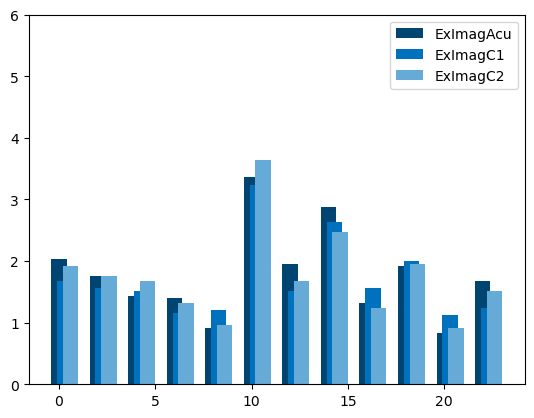

In [8]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)

stim_acu = np.nan_to_num(df_Acu_clean) 
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 


plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'ExImagAcu', color =
'#004471')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'ExImagC1', color =
'#0072bd')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'ExImagC2', color =
'#66aad7')
plt.legend()
plt.ylim(0, 6)

In [9]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,1.228889,0.614444,0.174553,8.398615e-01
C(Items),11.0,396.302222,36.027475,10.234809,9.685979e-18
C(Points):C(Items),22.0,15.357778,0.698081,0.198313,9.999801e-01
Residual,864.0,3041.360000,3.520093,NaN,NaN


Text(0.5, 1.0, 'MASS expectation imag, collapsed over items')

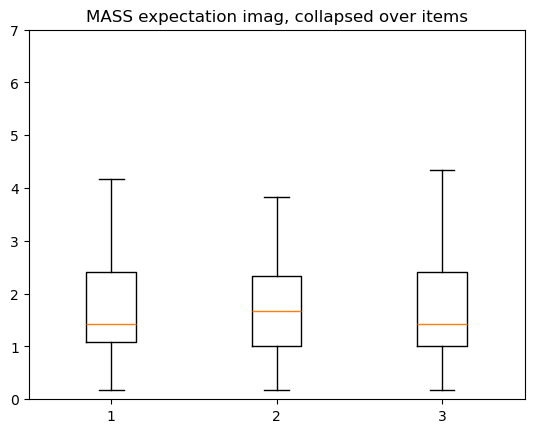

In [10]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
ex_imag = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('imags_pre.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_imags_pre.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_imags_pre.txt', weights_save.T)

plt.ylim(0, 7)
plt.title("MASS expectation imag, collapsed over items")

In [3]:
# Sess 1, after, Stim

FORMAT_Acu = ['1_A_1_1', '1_A_1_2', '1_A_1_3', '1_A_1_4', '1_A_1_5', '1_A_1_6', '1_A_1_7', '1_A_1_8', '1_A_1_9', '1_A_1_10', '1_A_1_11', '1_A_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['1_A_2_1', '1_A_2_2', '1_A_2_3', '1_A_2_4', '1_A_2_5', '1_A_2_6', '1_A_2_7', '1_A_2_8', '1_A_2_9', '1_A_2_10', '1_A_2_11', '1_A_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['1_A_3_1', '1_A_3_2', '1_A_3_3', '1_A_3_4', '1_A_3_5', '1_A_3_6', '1_A_3_7', '1_A_3_8', '1_A_3_9', '1_A_3_10', '1_A_3_11', '1_A_3_12']
df_C2 = df[FORMAT_C2]

(0.0, 6.0)

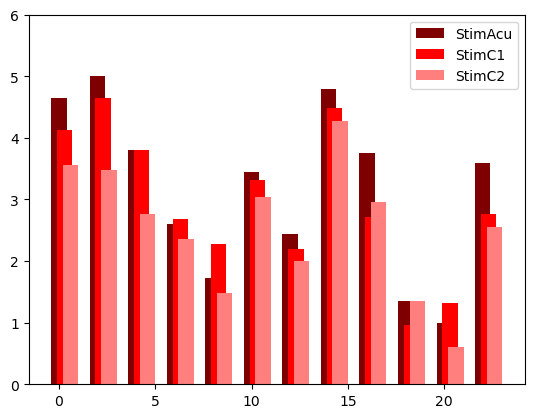

In [4]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)

stim_acu = np.nan_to_num(df_Acu_clean) # sj 6 has some NaNs
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 

plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'StimAcu', color =
'#7f0000')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'StimC1', color =
'#ff0000')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'StimC2', color =
'#ff7f7f')
plt.legend()
plt.ylim(0, 6)

In [5]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,63.415556,31.707778,5.198549,5.698692e-03
C(Items),11.0,1126.198889,102.381717,16.785672,2.774469e-30
C(Points):C(Items),22.0,57.757778,2.625354,0.430432,9.901127e-01
Residual,864.0,5269.840000,6.099352,NaN,NaN


In [6]:
test1= ttest_rel(np.mean(stim_acu,1), np.mean(stim_C1,1))
print('t(24) value of acu vs c1: ', np.round(test1.statistic,2), 'p value of acu vs c1: ', np.round(test1.pvalue,2))
test2= ttest_rel(np.mean(stim_acu,1), np.mean(stim_C2,1))
print('t(24) value of acu vs c2: ', np.round(test2.statistic,2), 'p value of acu vs c2: ', np.round(test2.pvalue,2))
test3= ttest_rel(np.mean(stim_C1,1), np.mean(stim_C2,1))
print('t(24) value of c1 vs c2: ', np.round(test3.statistic,2), 'p value of c1 vs c2: ', np.round(test3.pvalue,2))

t(24) value of acu vs c1:  0.83 p value of acu vs c1:  0.42
t(24) value of acu vs c2:  2.22 p value of acu vs c2:  0.04
t(24) value of c1 vs c2:  1.22 p value of c1 vs c2:  0.24


Text(0.5, 1.0, 'MASS Stim, collapsed over items')

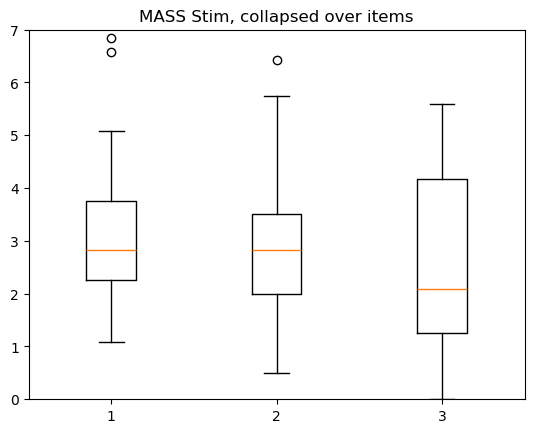

In [15]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
stim = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('stim_post.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_stim_post.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_stim_post.txt', weights_save.T)

plt.ylim(0, 7)
plt.title("MASS Stim, collapsed over items")

In [19]:
# Sess 1, after, Imag

FORMAT_Acu = ['1_I_1_1', '1_I_1_2', '1_I_1_3', '1_I_1_4', '1_I_1_5', '1_I_1_6', '1_I_1_7', '1_I_1_8', '1_I_1_9', '1_I_1_10', '1_I_1_11', '1_I_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['1_I_2_1', '1_I_2_2', '1_I_2_3', '1_I_2_4', '1_I_2_5', '1_I_2_6', '1_I_2_7', '1_I_2_8', '1_I_2_9', '1_I_2_10', '1_I_2_11', '1_I_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['1_I_3_1', '1_I_3_2', '1_I_3_3', '1_I_3_4', '1_I_3_5', '1_I_3_6', '1_I_3_7', '1_I_3_8', '1_I_3_9', '1_I_3_10', '1_I_3_11', '1_I_3_12']
df_C2 = df[FORMAT_C2]

(25, 12)
[1.8  2.44 2.24 1.76 1.64 2.28 1.24 2.36 2.08 0.64 0.32 1.4 ]


(0.0, 6.0)

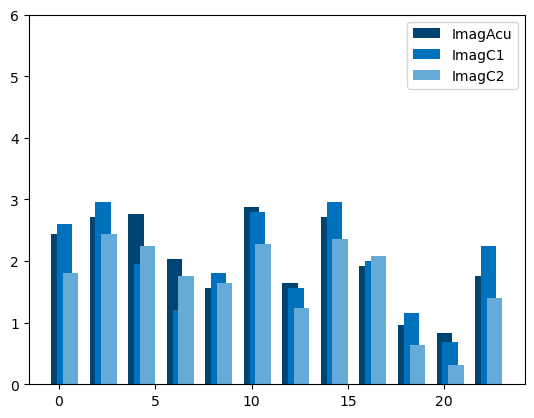

In [20]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)

stim_acu = np.nan_to_num(df_Acu_clean) 
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 

plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'ImagAcu', color =
'#004471')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'ImagC1', color =
'#0072bd')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'ImagC2', color =
'#66aad7')
plt.legend()
plt.ylim(0, 6)

In [21]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

900
(900,)


,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,21.015556,10.507778,2.254530,1.055398e-01
C(Items),11.0,380.145556,34.558687,7.414849,3.084408e-12
C(Points):C(Items),22.0,37.757778,1.716263,0.368238,9.967210e-01
Residual,864.0,4026.880000,4.660741,NaN,NaN


Text(0.5, 1.0, 'MASS Imag, collapsed over items')

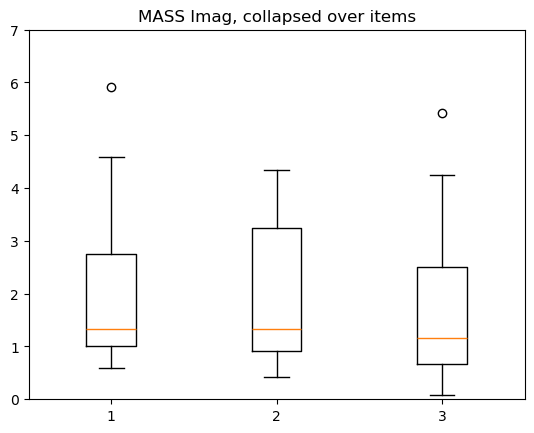

In [22]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
imag = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('imags_post.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_imags_post.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_imags_post.txt', weights_save.T)

plt.ylim(0, 7)
plt.title("MASS Imag, collapsed over items")

In [25]:
# Sess 2, before, Imag

FORMAT_Acu = ['2_EI_1_1', '2_EI_1_2', '2_EI_1_3', '2_EI_1_4', '2_EI_1_5', '2_EI_1_6', '2_EI_1_7', '2_EI_1_8', '2_EI_1_9', '2_EI_1_10', '2_EI_1_11', '2_EI_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['2_EI_2_1', '2_EI_2_2', '2_EI_2_3', '2_EI_2_4', '2_EI_2_5', '2_EI_2_6', '2_EI_2_7', '2_EI_2_8', '2_EI_2_9', '2_EI_2_10', '2_EI_2_11', '2_EI_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['2_EI_3_1', '2_EI_3_2', '2_EI_3_3', '2_EI_3_4', '2_EI_3_5', '2_EI_3_6', '2_EI_3_7', '2_EI_3_8', '2_EI_3_9', '2_EI_3_10', '2_EI_3_11', '2_EI_3_12']
df_C2 = df[FORMAT_C2]

(25, 12)
[1.72 2.28 1.56 1.4  1.12 2.2  1.12 2.68 1.84 1.24 1.   1.88]


(0.0, 6.0)

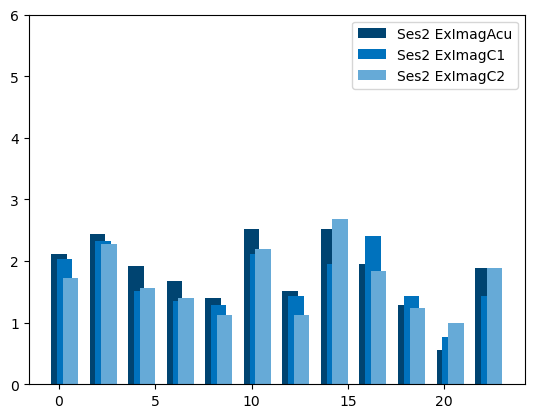

In [26]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)
print(df_Acu_clean.shape)

stim_acu = np.nan_to_num(df_Acu_clean) 
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 

print(np.mean(stim_C2,0))

plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'Ses2 ExImagAcu', color =
'#004471')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'Ses2 ExImagC1', color =
'#0072bd')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'Ses2 ExImagC2', color =
'#66aad7')
plt.legend()
plt.ylim(0, 6)

In [27]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)
print(25*12*3)
print(flat_data.shape)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

900
(900,)


,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,4.206667,2.103333,0.488621,0.613641
C(Items),11.0,208.533333,18.957576,4.403997,0.000002
C(Points):C(Items),22.0,25.500000,1.159091,0.269266,0.999719
Residual,864.0,3719.200000,4.304630,NaN,NaN


Text(0.5, 1.0, 'MASS Expectation Imag Sess 2, collapsed over items')

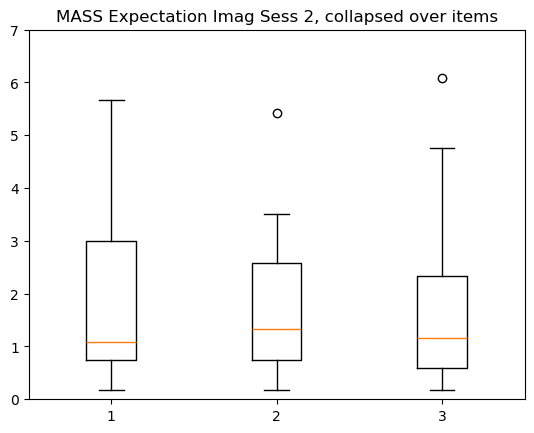

In [28]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
ex_imag2 = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('imags2_pre.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_imags2_pre.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_imags2_pre.txt', weights_save.T)

plt.ylim(0, 7)
plt.title("MASS Expectation Imag Sess 2, collapsed over items")

In [29]:
# Sess 2, before, Imag

FORMAT_Acu = ['2_I_1_1', '2_I_1_2', '2_I_1_3', '2_I_1_4', '2_I_1_5', '2_I_1_6', '2_I_1_7', '2_I_1_8', '2_I_1_9', '2_I_1_10', '2_I_1_11', '2_I_1_12']
df_Acu = df[FORMAT_Acu]
FORMAT_C1 = ['2_I_2_1', '2_I_2_2', '2_I_2_3', '2_I_2_4', '2_I_2_5', '2_I_2_6', '2_I_2_7', '2_I_2_8', '2_I_2_9', '2_I_2_10', '2_I_2_11', '2_I_2_12']
df_C1 = df[FORMAT_C1]
FORMAT_C2 = ['2_I_3_1', '2_I_3_2', '2_I_3_3', '2_I_3_4', '2_I_3_5', '2_I_3_6', '2_I_3_7', '2_I_3_8', '2_I_3_9', '2_I_3_10', '2_I_3_11', '2_I_3_12']
df_C2 = df[FORMAT_C2]

(25, 12)
[1.4  1.6  1.32 1.32 0.68 1.8  1.   1.52 1.36 0.92 0.64 1.48]


(0.0, 6.0)

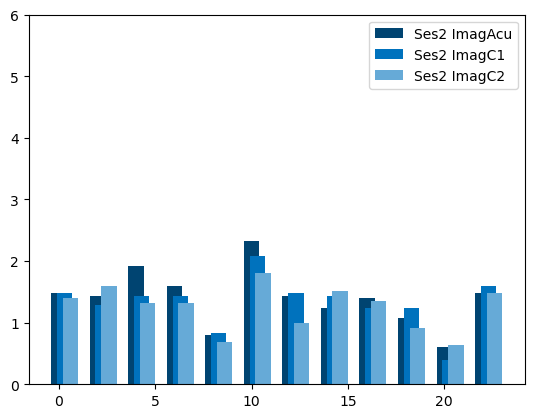

In [30]:
df_Acu_clean = np.delete(df_Acu.values, [10], 0)
df_C1_clean = np.delete(df_C1.values, [10], 0)
df_C2_clean = np.delete(df_C2.values, [10], 0)
print(df_Acu_clean.shape)

stim_acu = np.nan_to_num(df_Acu_clean) 
stim_C1 = np.nan_to_num(df_C1_clean) 
stim_C2 = np.nan_to_num(df_C2_clean) 

print(np.mean(stim_C2,0))

plt.bar(np.arange(12)*2, np.mean(stim_acu,0), label = 'Ses2 ImagAcu', color =
'#004471')
plt.bar(np.arange(12)*2+0.3, np.mean(stim_C1,0), label = 'Ses2 ImagC1', color =
'#0072bd')
plt.bar(np.arange(12)*2+0.6, np.mean(stim_C2,0), label = 'Ses2 ImagC2', color =
'#66aad7')
plt.legend()

plt.ylim(0, 6)

In [31]:
flat_data = np.append(stim_acu, stim_C1)
flat_data = np.append(flat_data, stim_C2)
print(25*12*3)
print(flat_data.shape)

dataframe = pd.DataFrame({'Points': np.repeat(['Acu', 'C1', 'C2'], 25*12),
                          'Items': np.tile(['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing'], 25*3),
                          'intensity': flat_data})

model = ols('intensity ~ C(Points) + C(Items) + C(Points):C(Items)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

900
(900,)


,df,sum_sq,mean_sq,F,PR(>F)
C(Points),2.0,3.228889,1.614444,0.551563,0.576252
C(Items),11.0,124.918889,11.356263,3.879781,0.000017
C(Points):C(Items),22.0,15.197778,0.690808,0.236009,0.999908
Residual,864.0,2528.960000,2.927037,NaN,NaN


Text(0.5, 1.0, 'MASS Imag Sess 2, collapsed over items')

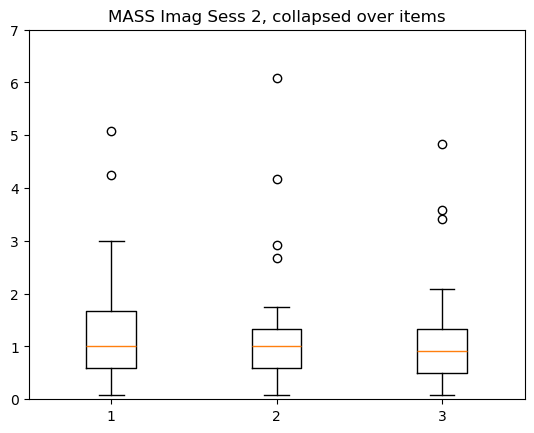

In [32]:
plt.boxplot((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))) 
imag2 = np.mean((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),0)

save_three = np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2)
np.savetxt('imags2_post.txt', save_three)
save_three_mean = np.mean(np.round((np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1)),2),1)
np.savetxt('MEAN_imags2_post.txt', save_three_mean)
weights_save = np.divide(save_three.T, save_three_mean)
np.savetxt('WEIGHTS_imags2_post.txt', weights_save.T)

plt.ylim(0, 7)
plt.title("MASS Imag Sess 2, collapsed over items")

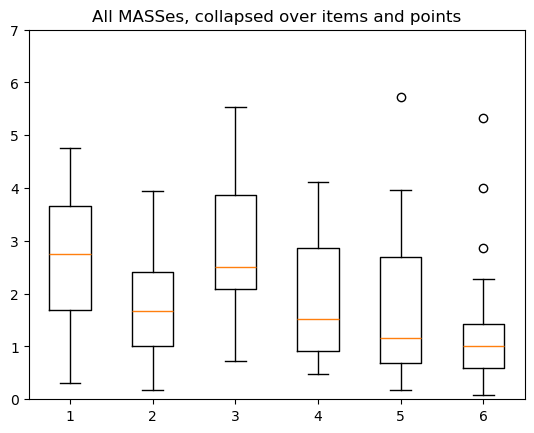

In [35]:
plt.boxplot((ex_stim, ex_imag, stim, imag, ex_imag2, imag2)) 
plt.ylim(0, 7)
plt.title("All MASSes, collapsed over items and points")
to_save = np.round((ex_stim, ex_imag, stim, imag, ex_imag2, imag2),2)
np.savetxt('exstim_eximag_stim_imag_eximag2_imag2.txt', to_save)
to_save_mean = np.mean((ex_stim, ex_imag, stim, imag, ex_imag2, imag2),1)
np.savetxt('MEANs_exstim_eximag_stim_imag_eximag2_imag2.txt', to_save_mean)

weights_save = np.divide(to_save.T, to_save_mean)
np.savetxt('WEIGHTS_exstim_eximag_stim_imag_eximag2_imag2.txt', weights_save.T)


## lets look at the behav data from the log files

In [36]:
answers = np.zeros([24,7,6,5])
path = '.../IMACU/Logs/logs_sorted/'

counter = 0
for s in np.arange(26):

    if s == 4 or s == 10:
        continue
    else:
        for r in np.arange(7):

            files = []
            for i in os.listdir(path):
                if os.path.isfile(os.path.join(path,i)) and 'newLogFile_subject_' + str(s+1) + '_sess_1_run_' + str(r+1) in i:
                    files.append(i)        

            log_file = pd.read_csv ('.../IMACU/Logs/logs_sorted/' + files[0], sep = '\t')

            answers[counter,r,0,:] = log_file[log_file['TrialNr'].values == 1]['Response'].values
            answers[counter,r,1,:] = log_file[log_file['TrialNr'].values == 2]['Response'].values
            answers[counter,r,2,:] = log_file[log_file['TrialNr'].values == 3]['Response'].values
            answers[counter,r,3,:] = log_file[log_file['TrialNr'].values == 4]['Response'].values
            answers[counter,r,4,:] = log_file[log_file['TrialNr'].values == 5]['Response'].values
            answers[counter,r,5,:] = log_file[log_file['TrialNr'].values == 6]['Response'].values

        counter += 1


(24, 7, 6, 5)
(24, 7, 6)
(24, 6)
(6,)


Text(0.5, 1.0, 'Intensity/Vividness as per button presses')

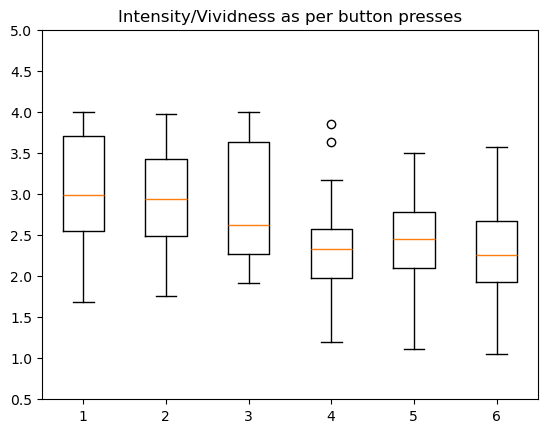

In [37]:
print(np.shape(answers))

# mean over trials
first_mean = np.mean(answers,3, where = answers>0) # exclude zeros
print(np.shape(first_mean))

# mean over sessions
second_mean = np.mean(first_mean,1)
print(np.shape(second_mean))

# mean over subjects?
third_mean = np.mean(second_mean,0)
print(np.shape(third_mean))

sj_counts = np.zeros([24,6,5])
for j in np.arange(24):
    for c in np.arange(6):
        unique, counts = np.unique(answers[j,:,c,:], return_counts=True)
        sj_counts[j,c,unique.astype(np.int64)] = counts

plt.boxplot(second_mean) 
plt.ylim(0.5, 5)
plt.title("Intensity/Vividness as per button presses")

In [38]:
flat_data = np.ndarray.flatten(first_mean[:,:,0:3])
print(24*7*3)
print(flat_data.shape)

dataframe = pd.DataFrame({'Conditions': np.tile(['StimAcu', 'StimC1', 'StimC2'], 24*7),
                          'Runs': np.tile(np.repeat(['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7'], 3), 24),
                          'rating': flat_data})

model = ols('rating ~ C(Conditions) + C(Runs) + C(Conditions):C(Runs)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

504
(504,)


,df,sum_sq,mean_sq,F,PR(>F)
C(Conditions),2.0,2.563047,1.281523,2.290100,0.102355
C(Runs),6.0,0.446263,0.074377,0.132913,0.992071
C(Conditions):C(Runs),12.0,1.878304,0.156525,0.279713,0.992220
Residual,483.0,270.283356,0.559593,NaN,NaN


In [39]:
flat_data = np.ndarray.flatten(first_mean[:,:,3:7])
print(24*7*3)
print(flat_data.shape)

dataframe = pd.DataFrame({'Conditions': np.tile(['ImagAcu', 'ImagC1', 'ImagC2'], 24*7),
                          'Runs': np.tile(np.repeat(['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7'], 3), 24),
                          'rating': flat_data})

model = ols('rating ~ C(Conditions) + C(Runs) + C(Conditions):C(Runs)', data=dataframe).fit()
anova_result = sm.stats.anova_lm(model, type=2)
anova_result

504
(504,)


,df,sum_sq,mean_sq,F,PR(>F)
C(Conditions),2.0,1.231258,0.615629,1.247941,0.288019
C(Runs),6.0,1.632977,0.272163,0.551701,0.768719
C(Conditions):C(Runs),12.0,0.507932,0.042328,0.085802,0.999982
Residual,483.0,238.271562,0.493316,NaN,NaN


Text(0.5, 1.0, 'Intensity/Vividness as per button presses, collapsed')

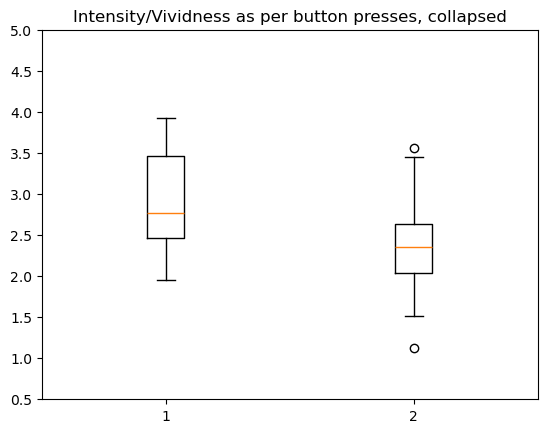

In [40]:
mean_stim_int = np.mean(second_mean[:,:3], 1)
mean_imag_int = np.mean(second_mean[:,3:], 1)

plt.boxplot((mean_stim_int,mean_imag_int)) 
plt.ylim(0.5, 5)
plt.title("Intensity/Vividness as per button presses, collapsed")

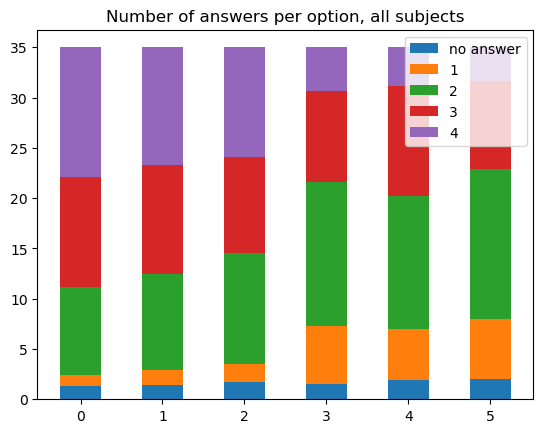

In [41]:
np.mean(sj_counts[:,:,0],axis=0)

ans_opt = np.arange(6)
weight_counts = {
        "no answer": np.mean(sj_counts[:,:,0],axis=0),
        "1": np.mean(sj_counts[:,:,1],axis=0),
        "2": np.mean(sj_counts[:,:,2],axis=0),
        "3": np.mean(sj_counts[:,:,3],axis=0),
        "4": np.mean(sj_counts[:,:,4],axis=0),
}
    
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(6)

for boolean, ans_count in weight_counts.items():
    p = ax.bar(ans_opt, ans_count, width, label=boolean, bottom=bottom)
    bottom += ans_count

ax.set_title("Number of answers per option, all subjects")
ax.legend(loc="upper right")

plt.show()

(5,)
(2, 5)


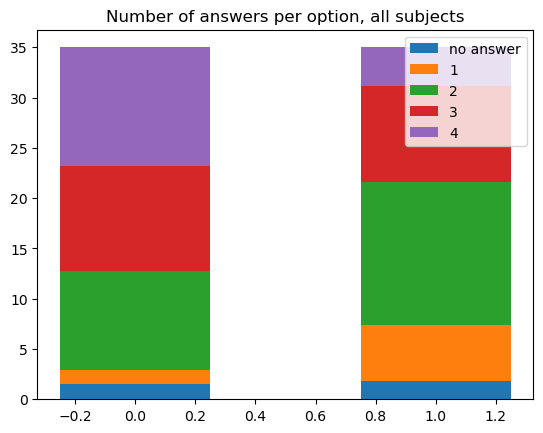

In [42]:
collapsed = np.mean(np.mean(sj_counts[:,:3,:],axis=1),0)
print(collapsed.shape)
collapsed = np.array([collapsed, np.mean(np.mean(sj_counts[:,3:,:],axis=1),0)])
print(collapsed.shape)

ans_opt = np.arange(2)
weight_counts = {
        "no answer": collapsed[:,0],
        "1": collapsed[:,1],
        "2": collapsed[:,2],
        "3": collapsed[:,3],
        "4": collapsed[:,4],
}
    
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, ans_count in weight_counts.items():
    p = ax.bar(ans_opt, ans_count, width, label=boolean, bottom=bottom)
    bottom += ans_count

ax.set_title("Number of answers per option, all subjects")
ax.legend(loc="upper right")

plt.show()

[[ 0.  0. 16. 14.  5.]
 [ 0.  2. 15. 12.  6.]
 [ 0.  0. 17. 14.  4.]
 [ 1.  7. 20.  7.  0.]
 [ 0.  8. 17.  8.  2.]
 [ 1.  6. 15. 11.  2.]]


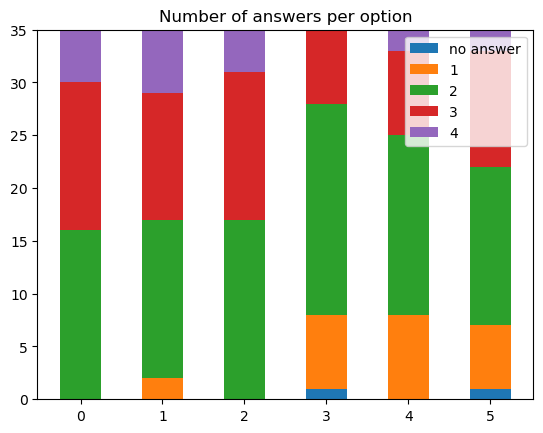

[[ 3.  0.  0.  0. 32.]
 [ 0.  1.  0.  3. 31.]
 [ 3.  0.  0.  2. 30.]
 [ 5.  0.  0.  5. 25.]
 [ 1.  0.  5. 20.  9.]
 [ 3.  0.  3. 14. 15.]]


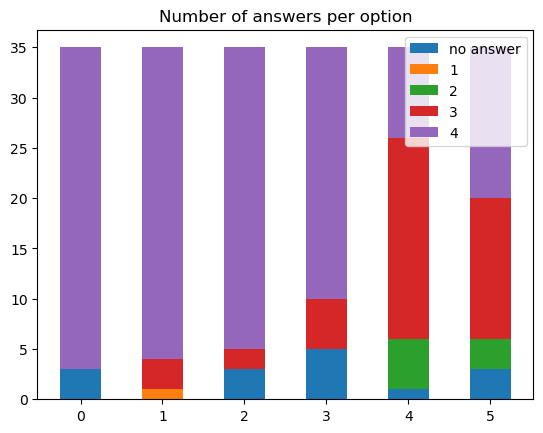

[[ 1.  0.  5. 29.  0.]
 [ 0.  0. 12. 23.  0.]
 [ 0.  1. 25.  9.  0.]
 [ 0.  2. 15. 18.  0.]
 [ 1.  3. 23.  8.  0.]
 [ 0.  2. 32.  1.  0.]]


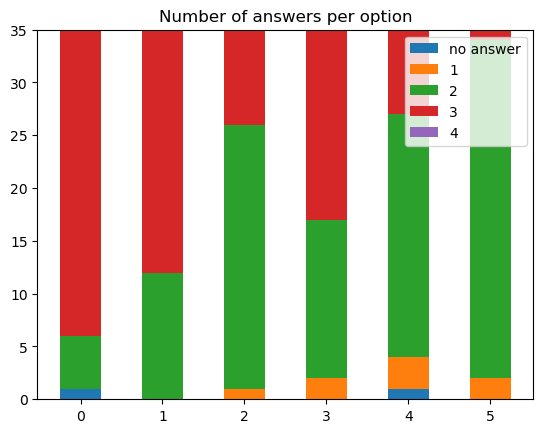

[[ 0.  0. 18. 16.  1.]
 [ 1.  0.  6. 18. 10.]
 [ 2.  0. 14. 18.  1.]
 [ 3. 18. 11.  3.  0.]
 [ 3. 13. 17.  2.  0.]
 [ 7. 18.  9.  1.  0.]]


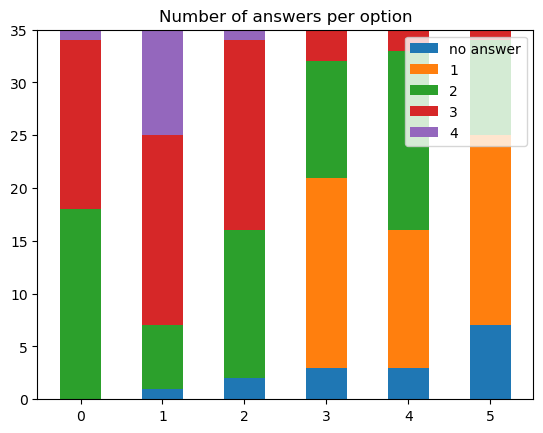

[[ 0.  7. 13. 12.  3.]
 [ 0.  1. 10. 18.  6.]
 [ 0.  3. 20. 12.  0.]
 [ 1.  0. 16. 17.  1.]
 [ 0.  1.  8. 24.  2.]
 [ 0.  0. 14. 21.  0.]]


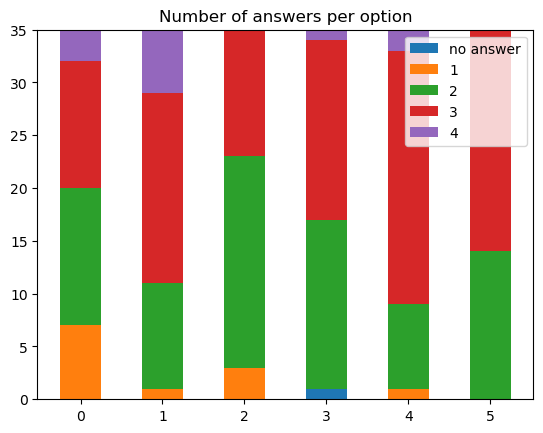

[[ 0.  0.  1.  0. 34.]
 [ 1.  0.  0.  1. 33.]
 [ 2.  0.  1.  3. 29.]
 [ 1.  0.  6. 16. 12.]
 [ 1.  1.  5. 14. 14.]
 [ 2.  1.  6. 13. 13.]]


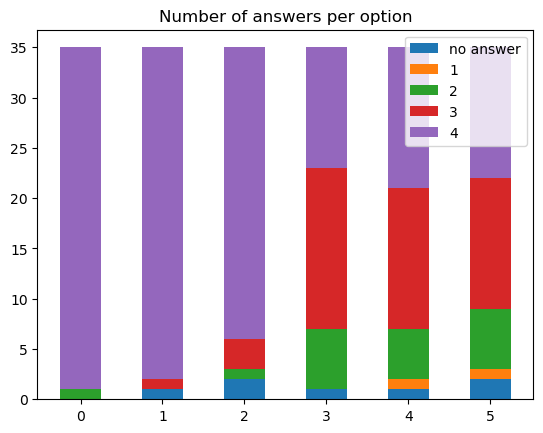

[[ 2.  1.  4. 21.  7.]
 [ 0.  0.  2. 16. 17.]
 [ 3.  1.  0. 17. 14.]
 [ 3.  0. 15. 17.  0.]
 [ 1.  0. 13. 19.  2.]
 [ 6.  0. 10. 18.  1.]]


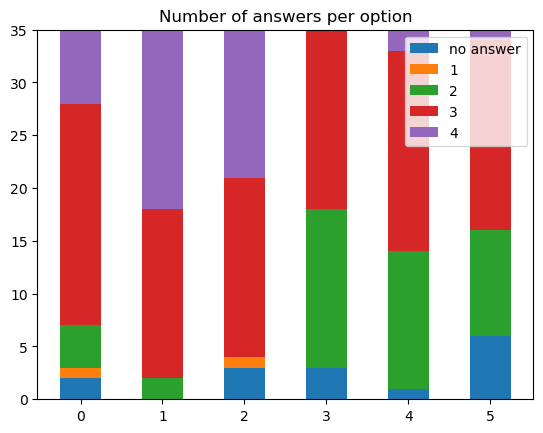

[[ 1.  1.  9. 13. 11.]
 [ 6.  0.  9.  6. 14.]
 [ 1.  0.  1.  0. 33.]
 [ 2.  7. 15.  8.  3.]
 [ 4.  4.  8.  6. 13.]
 [ 3.  3.  9. 13.  7.]]


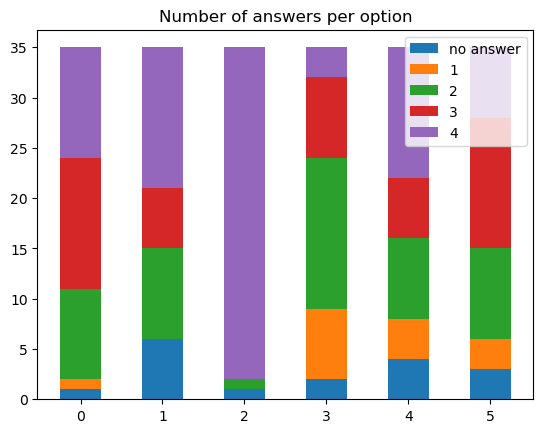

[[ 1.  1.  7. 18.  8.]
 [ 1.  5. 11. 13.  5.]
 [ 1.  6. 15. 11.  2.]
 [ 1.  4. 15.  9.  6.]
 [ 1.  4.  6. 21.  3.]
 [ 1.  9. 14. 11.  0.]]


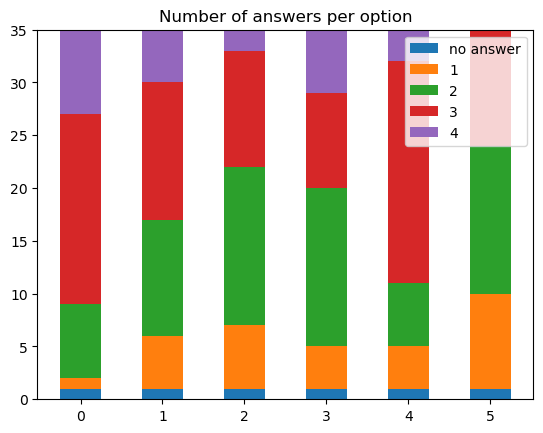

[[ 3.  0. 24.  7.  1.]
 [ 3.  0. 21. 11.  0.]
 [ 1.  0.  4. 22.  8.]
 [ 3.  2. 30.  0.  0.]
 [ 2.  2. 23.  7.  1.]
 [ 1.  1. 22.  8.  3.]]


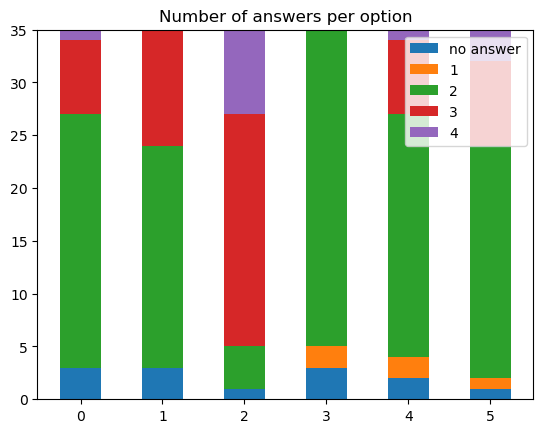

[[ 1.  0. 15. 10.  9.]
 [ 1.  4. 21.  6.  3.]
 [ 1.  2. 19. 12.  1.]
 [ 1.  8. 16.  9.  1.]
 [ 3.  3. 20.  8.  1.]
 [ 0. 10. 20.  4.  1.]]


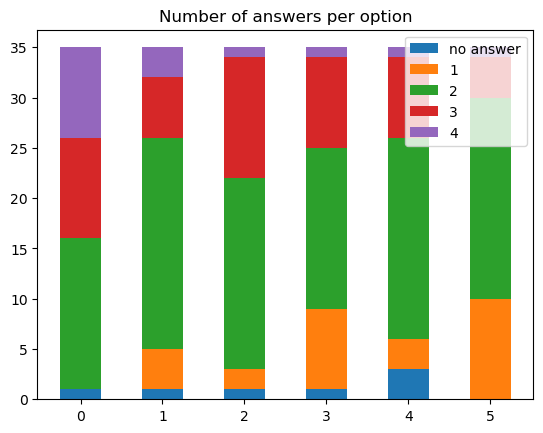

[[ 0.  0.  3. 18. 14.]
 [ 0.  0.  5. 17. 13.]
 [ 0.  0.  0. 13. 22.]
 [ 0.  8. 14.  8.  5.]
 [ 0.  5. 13. 15.  2.]
 [ 0.  5. 16. 12.  2.]]


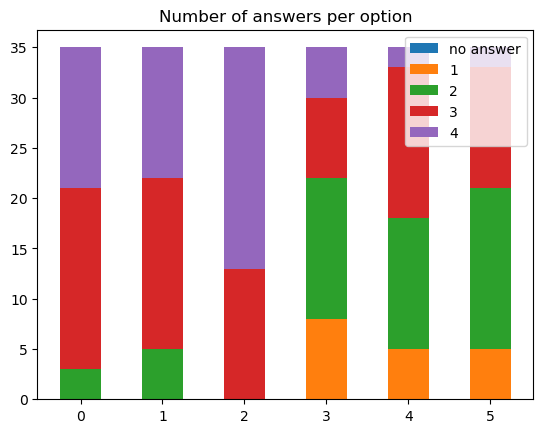

[[ 3.  0.  0. 11. 21.]
 [ 5.  1.  1. 23.  5.]
 [ 5.  0.  2. 27.  1.]
 [ 3.  0. 20. 12.  0.]
 [ 2.  0. 16. 17.  0.]
 [ 5.  0. 23.  7.  0.]]


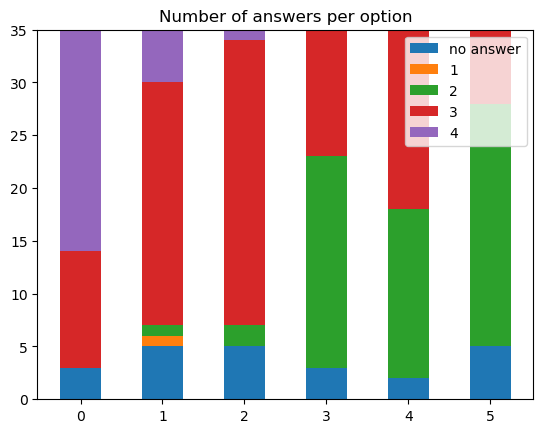

[[ 0. 14. 18.  3.  0.]
 [ 1.  4. 21.  7.  2.]
 [ 3.  6. 22.  4.  0.]
 [ 2.  4. 12. 13.  4.]
 [ 2.  3.  9. 16.  5.]
 [ 0.  1. 11. 18.  5.]]


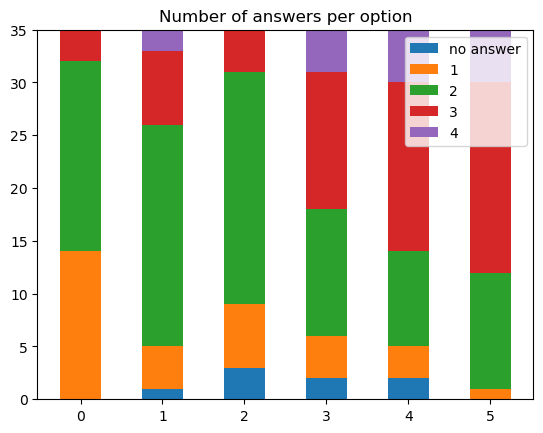

[[ 0.  0. 22.  7.  6.]
 [ 1.  0. 17. 11.  6.]
 [ 1.  0. 31.  2.  1.]
 [ 0.  7. 27.  1.  0.]
 [ 1.  0. 28.  6.  0.]
 [ 1.  3. 30.  1.  0.]]


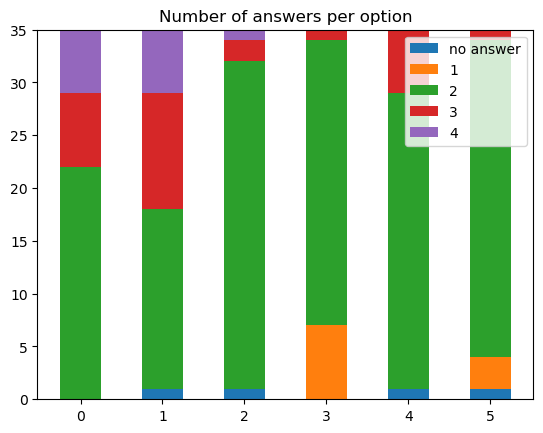

[[ 1.  3. 22.  6.  3.]
 [ 1.  2. 12. 11.  9.]
 [ 2.  8. 13.  7.  5.]
 [ 1. 27.  7.  0.  0.]
 [ 2. 30.  2.  1.  0.]
 [ 2. 31.  2.  0.  0.]]


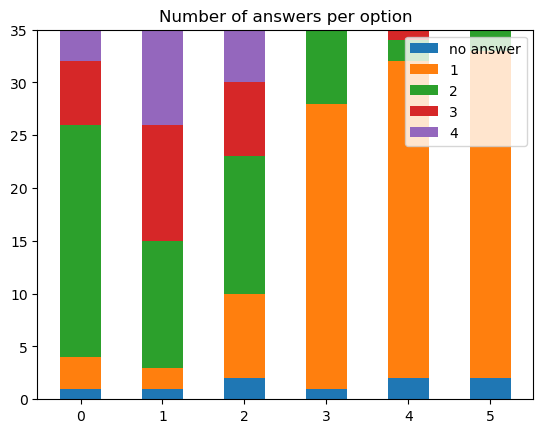

[[ 3.  0.  5. 21.  6.]
 [ 4. 11. 17.  2.  1.]
 [ 4.  7. 21.  1.  2.]
 [ 1. 11. 23.  0.  0.]
 [ 3. 18. 14.  0.  0.]
 [ 3. 17. 15.  0.  0.]]


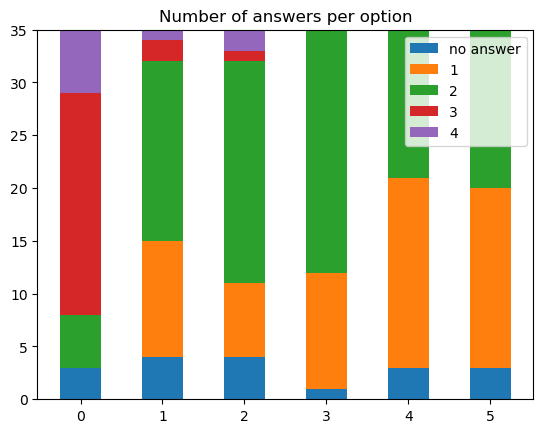

[[ 3.  0.  1.  3. 28.]
 [ 1.  1. 20. 12.  1.]
 [ 7.  1. 14. 13.  0.]
 [ 1. 11. 13.  9.  1.]
 [ 4. 17. 13.  1.  0.]
 [ 4. 18. 12.  1.  0.]]


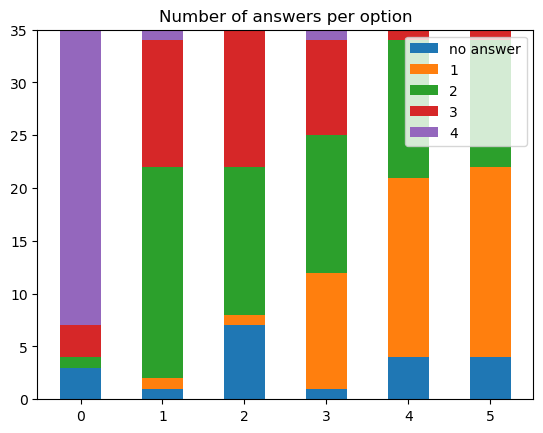

[[ 6.  0. 15. 14.  0.]
 [ 2.  3. 19. 11.  0.]
 [ 1.  1. 24.  7.  2.]
 [ 4.  4. 17. 10.  0.]
 [ 5.  4. 20.  6.  0.]
 [ 6.  3. 17.  9.  0.]]


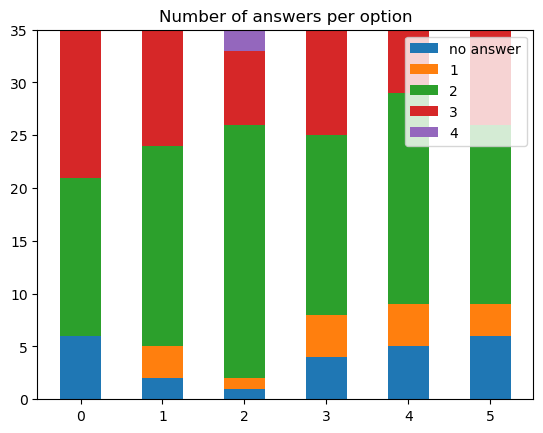

[[ 0.  0.  0.  1. 34.]
 [ 1.  1.  1. 14. 18.]
 [ 0.  0.  2.  8. 25.]
 [ 1. 10. 24.  0.  0.]
 [ 1.  2. 31.  1.  0.]
 [ 0.  5. 29.  1.  0.]]


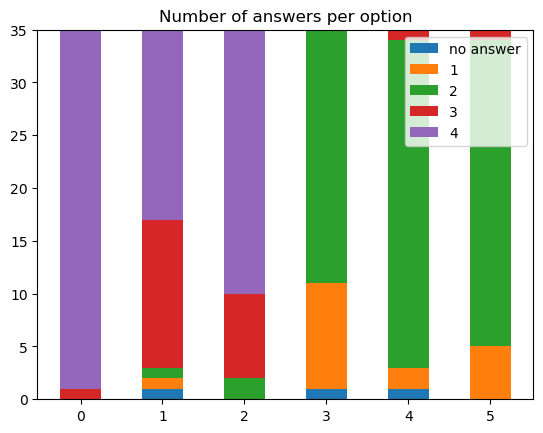

[[ 0.  0.  0.  4. 31.]
 [ 2.  0.  1.  4. 28.]
 [ 1.  0.  4. 17. 13.]
 [ 0.  2. 13. 16.  4.]
 [ 2.  1. 14. 15.  3.]
 [ 0.  0. 15. 16.  4.]]


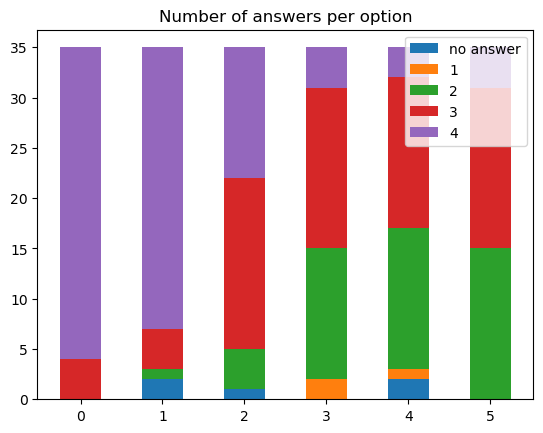

[[ 0.  0.  9. 20.  6.]
 [ 0.  2.  6. 10. 17.]
 [ 1.  5. 17. 10.  2.]
 [ 1.  3. 10. 11. 10.]
 [ 2.  3.  6. 17.  7.]
 [ 1.  9. 16.  6.  3.]]


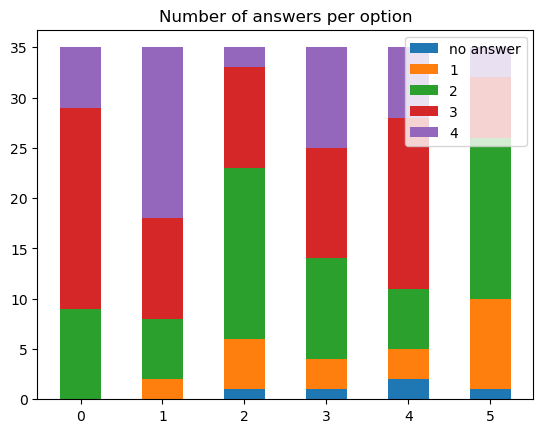

[[ 0.  0.  0.  3. 32.]
 [ 0.  0.  1.  3. 31.]
 [ 0.  0.  0.  1. 34.]
 [ 0.  2.  0.  7. 26.]
 [ 1.  1.  2. 10. 21.]
 [ 0.  0.  3.  9. 23.]]


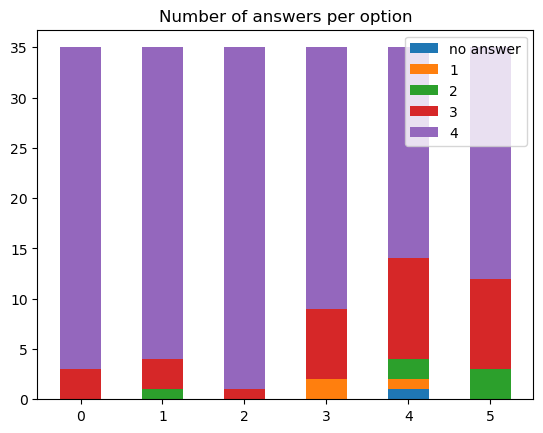

[[ 3.  0.  3. 11. 18.]
 [ 2.  0.  0.  9. 24.]
 [ 3.  0.  0.  0. 32.]
 [ 2.  1.  4. 22.  6.]
 [ 3.  0.  5. 19.  8.]
 [ 3.  1. 15. 15.  1.]]


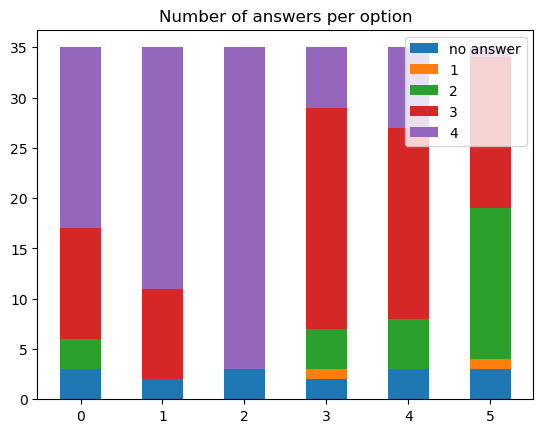

In [43]:
for s in np.arange(24):
    print(sj_counts[s,:,:])

    ans_opt = np.arange(6)
    weight_counts = {
        "no answer": sj_counts[s,:,0],
        "1": sj_counts[s,:,1],
        "2": sj_counts[s,:,2],
        "3": sj_counts[s,:,3],
        "4": sj_counts[s,:,4],
    }
    
    width = 0.5

    fig, ax = plt.subplots()
    bottom = np.zeros(6)

    for boolean, ans_count in weight_counts.items():
        p = ax.bar(ans_opt, ans_count, width, label=boolean, bottom=bottom)
        bottom += ans_count

    ax.set_title("Number of answers per option")
    ax.legend(loc="upper right")

    plt.show()